In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 675M/675M [00:24<00:00, 31.2MB/s]
100% 675M/675M [00:24<00:00, 29.2MB/s]


In [ ]:
!unzip /content/cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
# prompt: there is two classes Parasitized and  Uninfected, read all images where the paths are as follows /content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png, and read only the images not anything else

import cv2
import os

Parasitized_path = '/content/cell_images/Parasitized/'
Uninfected_path = '/content/cell_images/Uninfected/'

Parasitized_images = []
Uninfected_images = []

for img in os.listdir(Parasitized_path):
    image = cv2.imread(Parasitized_path + img)
    if image is not None: # Check if the image was loaded successfully
      Parasitized_images.append(image)


for img in os.listdir(Uninfected_path):
    image = cv2.imread(Uninfected_path + img)
    if image is not None: # Check if the image was loaded successfully
      Uninfected_images.append(image)

# Now you have two lists: Parasitized_images and Uninfected_images, containing the loaded images
print(f"Number of Parasitized images: {len(Parasitized_images)}")
print(f"Number of Uninfected images: {len(Uninfected_images)}")


Number of Parasitized images: 13779
Number of Uninfected images: 13779


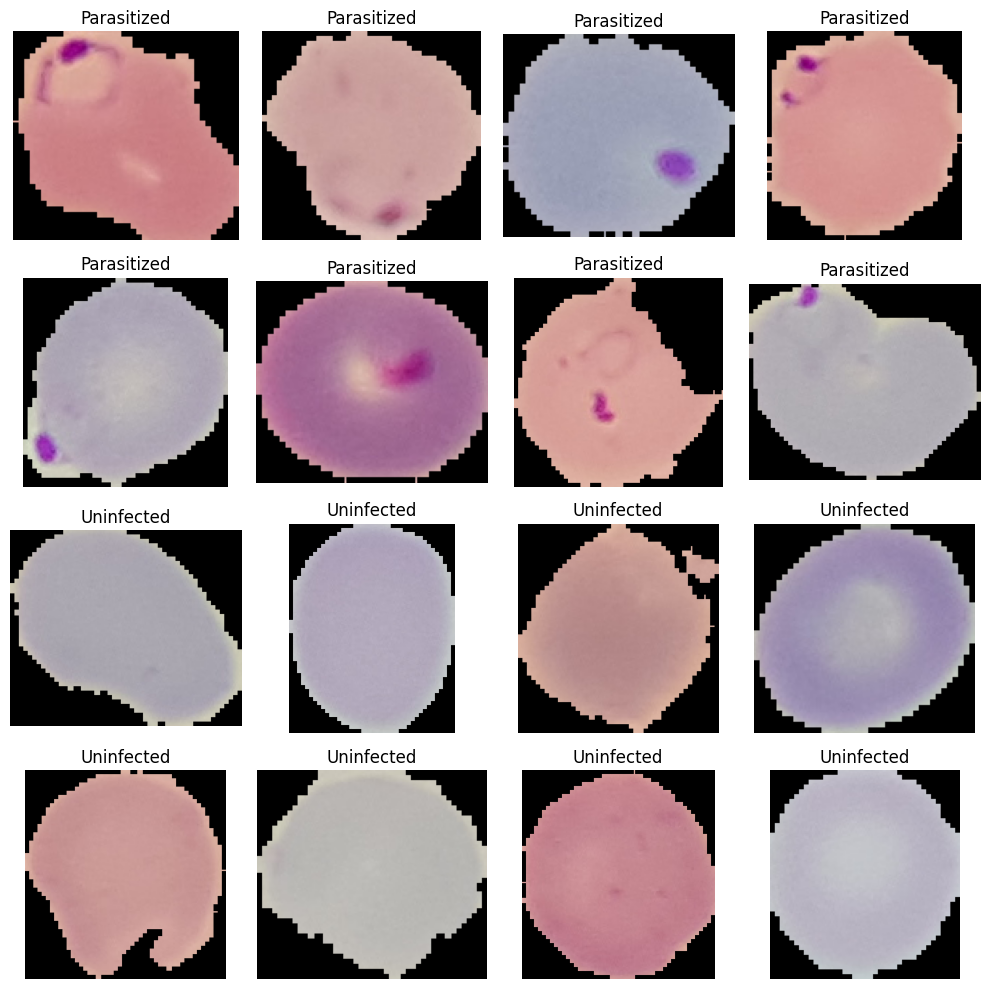

In [ ]:
# prompt: print some of those images in 4x4 grid with their labels

import matplotlib.pyplot as plt

# Assuming Parasitized_images and Uninfected_images are already defined and populated

# Select a subset of images (e.g., the first 16)
selected_parasitized = Parasitized_images[:8]
selected_uninfected = Uninfected_images[:8]


# Combine the selected images and labels
images1 = selected_parasitized + selected_uninfected
labels1 = ['Parasitized'] * 8 + ['Uninfected'] * 8


# Create the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()


# Iterate through the images1 and display them with labels1
for i in range(len(images1)):
    axes[i].imshow(cv2.cvtColor(images1[i], cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for Matplotlib
    axes[i].set_title(labels1[i])
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Number of resized Parasitized images: 13779
Number of resized Uninfected images: 13779


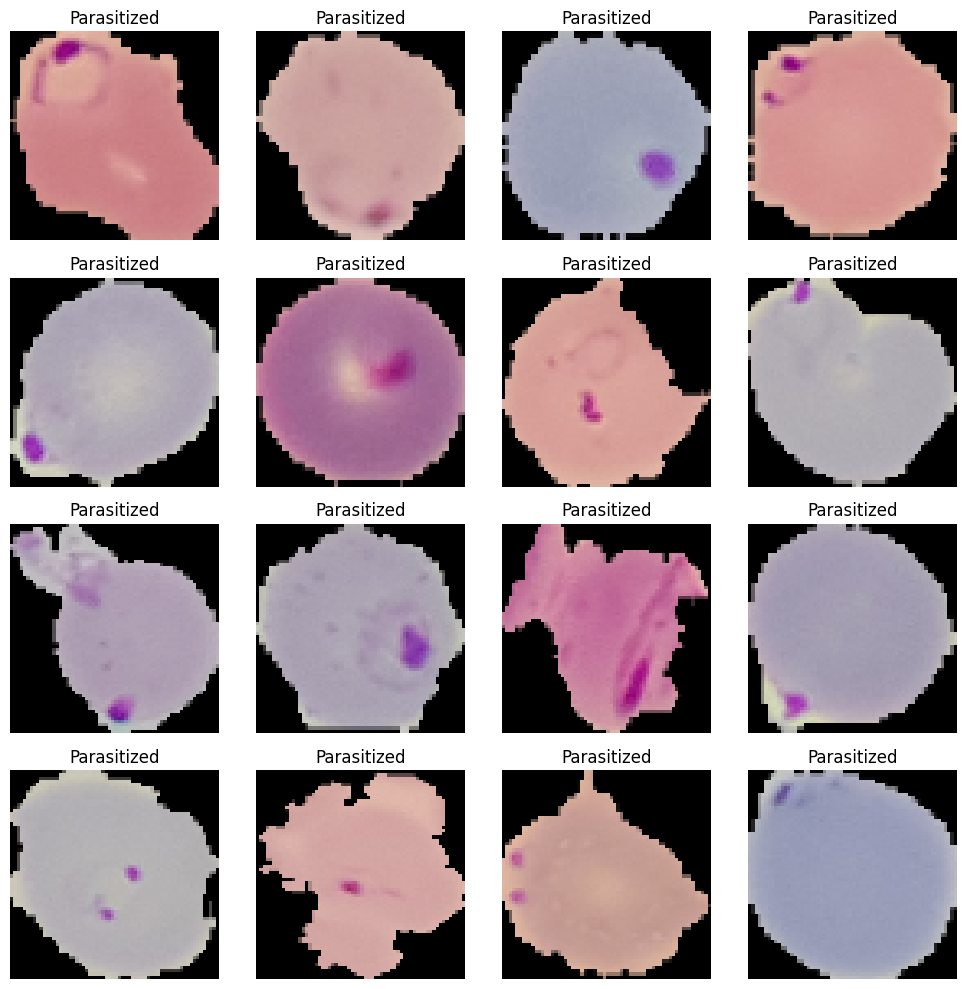

In [ ]:



# prompt: reshape all the images to 226,226

import cv2

# Resize images to 226x226
resized_parasitized_images = [cv2.resize(img, (64, 64)) for img in Parasitized_images]
resized_uninfected_images = [cv2.resize(img, (64, 64)) for img in Uninfected_images]

# Now you have two lists with resized images
print(f"Number of resized Parasitized images: {len(resized_parasitized_images)}")
print(f"Number of resized Uninfected images: {len(resized_uninfected_images)}")


images = resized_parasitized_images + resized_uninfected_images
labels = ['Parasitized'] * len(resized_parasitized_images) + ['Uninfected'] * len(resized_uninfected_images)


fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(len(images[:16])):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

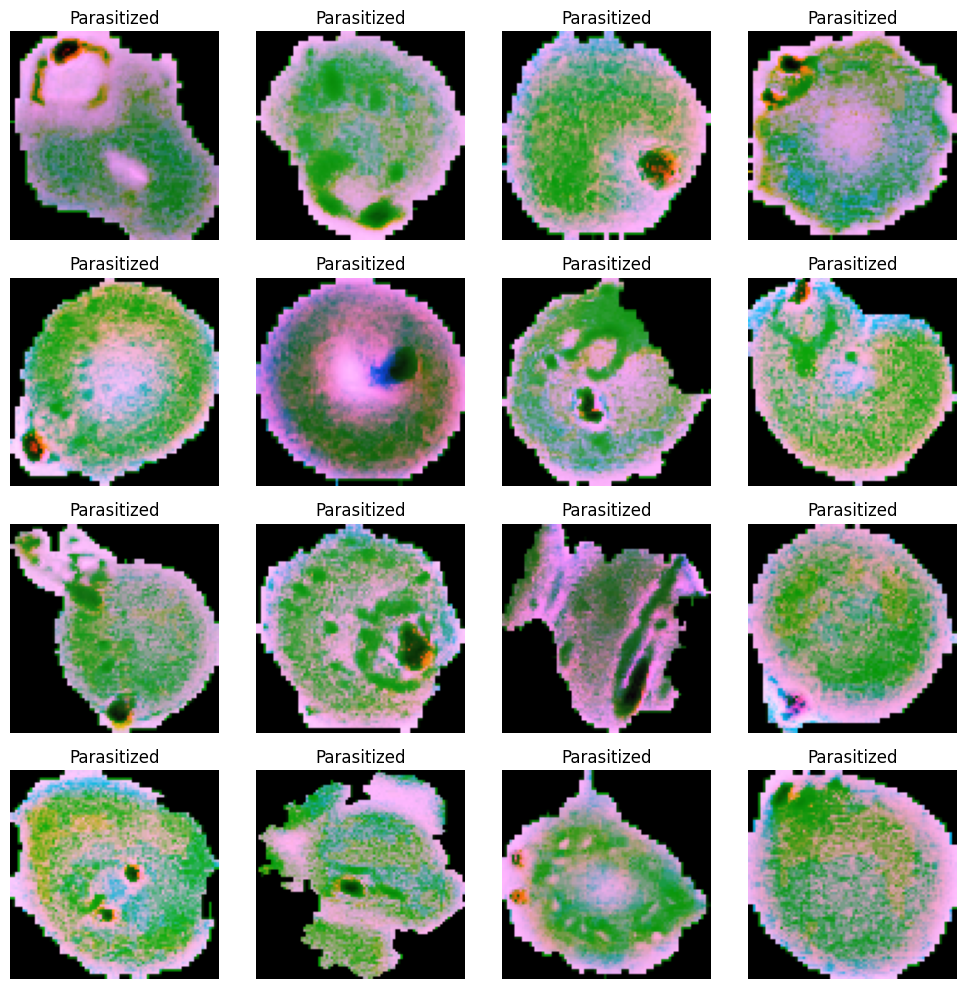

In [ ]:
# prompt: apply histogram equalization on the images

import cv2
import numpy as np

def apply_histogram_equalization(image):
  # Convert the image to grayscale
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



  # Apply histogram equalization
  p1 = cv2.equalizeHist(image[:,:,0])
  p2 = image[:,:,1]#cv2.equalizeHist(image[:,:,1])
  p3 = cv2.equalizeHist(image[:,:,2])

  equalized = cv2.merge((p1, p2, p3))

  # Convert back to BGR color space (optional)
  # equalized_bgr = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

  return equalized


# Assuming resized_parasitized_images and resized_uninfected_images are defined
images = [apply_histogram_equalization(img) for img in images]


# Example: Display the first 16 equalized images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

equalized_images = images[:16]
for i in range(len(equalized_images)):
    axes[i].imshow(equalized_images[i], cmap='gray') # Display grayscale images
    axes[i].set_title(labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

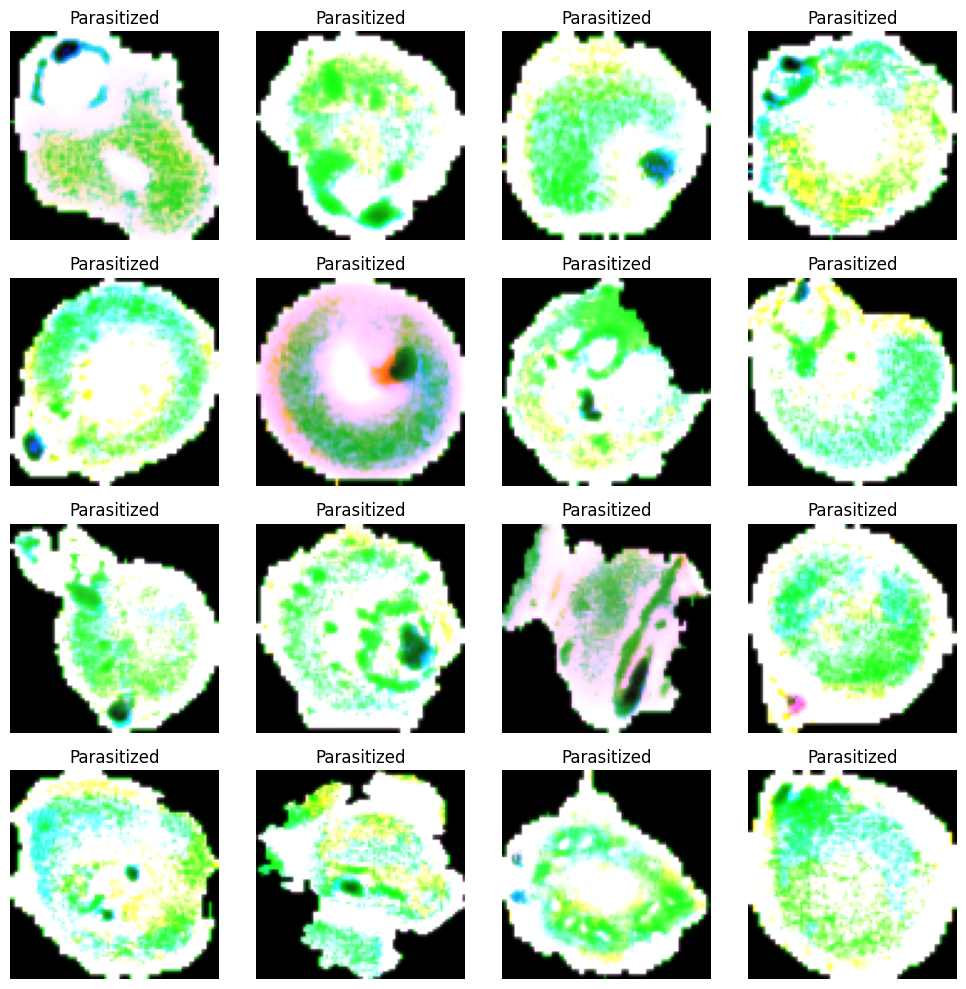

In [ ]:
# prompt: apply Gabor Filter on the images

import cv2
import numpy as np

def apply_gabor_filter(image):
  # Define Gabor filter parameters
  ksize = 50  # Size of the Gabor filter kernel
  sigma = 0.5  # Standard deviation of the Gaussian envelope
  theta = 0  # Orientation of the normal to the parallel stripes
  lambda_ = 1  # Wavelength of the sinusoidal factor
  gamma = 0.9  # Spatial aspect ratio
  psi = 0  # Phase offset

  # Create the Gabor kernel
  gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi, ktype=cv2.CV_32F)

  # Apply the Gabor filter to the image
  filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)

  return filtered_image


# Example usage (assuming 'images' list is defined as in your previous code):

filtered_images = []
for image in images[:16]: # Process only the first 16 images for demonstration
    filtered_img = apply_gabor_filter(image)
    filtered_images.append(filtered_img)


fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(len(filtered_images)):
    axes[i].imshow(cv2.cvtColor(filtered_images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for i,img in enumerate(filtered_images):
   images[i] = cv2.cvtColor(filtered_images[i], cv2.COLOR_BGR2RGB)

In [ ]:
# prompt: split into train and test and the labels put them as numbers

import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'images' and 'labels' are defined as in the previous code

# Convert labels to numerical representation
label_mapping = {'Parasitized': 1, 'Uninfected': 0}
numerical_labels = [label_mapping[label] for label in labels]

# Convert images to a NumPy array (if not already)
images = np.array(images)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    images, numerical_labels, test_size=0.2, random_state=42
)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", len(y_train))
print("X_test shape:", X_test.shape)
print("y_test shape:", len(y_test))

X_train shape: (22046, 64, 64, 3)
y_train shape: 22046
X_test shape: (5512, 64, 64, 3)
y_test shape: 5512


In [ ]:
# prompt: do data augmentation on the train dataset (the augmentation is rotate...)

import cv2
import numpy as np

def rotate_image(image, angle):
  """Rotates an image by a given angle.

  Args:
    image: The image to rotate.
    angle: The angle to rotate the image by, in degrees.

  Returns:
    The rotated image.
  """
  rows, cols, _ = image.shape
  rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
  rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
  return rotated_image

# Assuming X_train and y_train are defined as in your previous code

augmented_images = []
augmented_labels = []

for i in range(len(X_train)):
  image = X_train[i]
  label = y_train[i]

  # Rotate the image by different angles
  rotated_image_15 = rotate_image(image, 15)
  rotated_image_30 = rotate_image(image, 30)

  # Add the augmented images and labels to the lists
  augmented_images.append(rotated_image_15)
  augmented_labels.append(label)
  # augmented_images.append(rotated_image_30)
  # augmented_labels.append(label)

# Convert augmented images and labels to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate the original and augmented data
X_train = np.concatenate((X_train, augmented_images), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

In [ ]:
# fake_train = []
# fake_test = []
# for x in X_train:
#   # x[:,:,3] = x[:,:,0]@x[:,:,0]
#   # x[:,:,4] = x[:,:,1]@x[:,:,1]
#   # x[:,:,5] = x[:,:,2]@x[:,:,2]
#   x = np.concatenate((x,(x[:,:,0]@x[:,:,0])[:,:,np.newaxis],(x[:,:,1]@x[:,:,1])[:,:,np.newaxis],(x[:,:,2]@x[:,:,2])[:,:,np.newaxis]),axis=2)
#   fake_train.append(x)


# for x in X_test:
#   # x[:,:,3] = x[:,:,0]@x[:,:,0]
#   # x[:,:,4] = x[:,:,1]@x[:,:,1]
#   # x[:,:,5] = x[:,:,2]@x[:,:,2]
#   x = np.concatenate((x,(x[:,:,0]@x[:,:,0])[:,:,np.newaxis],(x[:,:,1]@x[:,:,1])[:,:,np.newaxis],(x[:,:,2]@x[:,:,2])[:,:,np.newaxis]),axis=2)
#   fake_test.append(x)

# X_train = np.array(fake_train)
# X_test = np.array(fake_test)


In [ ]:
# prompt: create a model and train it where the validation is the test data

import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model using the test data as validation data
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size = 2)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

In [ ]:
# prompt: use a pretrained model to train

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Load the pre-trained ResNet50 model (excluding the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(84, 84, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
# x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using the test data as validation data
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=8)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.5699 - loss: 0.7004 - val_accuracy: 0.6720 - val_loss: 0.6286
Epoch 2/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.6749 - loss: 0.6062 - val_accuracy: 0.6929 - val_loss: 0.5885
Epoch 3/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.6865 - loss: 0.5934 - val_accuracy: 0.7092 - val_loss: 0.5739
Epoch 4/10
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.7095 - loss: 0.5688 - val_accuracy: 0.7161 - val_loss: 0.5582
Epoch 5/10


KeyboardInterrupt: 

In [ ]:
# prompt: use mobile net

# Load the MobileNetV2 model pre-trained on ImageNet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(84, 84, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using the test data as validation data
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

<ipython-input-11-659d417625d9>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(84, 84, 3))


KeyboardInterrupt: 

In [ ]:
# prompt: show the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to class labels


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()